## Exploratory Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datasets import load_dataset
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.text import Text
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')

plt.style.use('seaborn-v0_8') 
sns.set_theme(style="whitegrid")  
sns.set_palette("muted")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/haitong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/haitong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 1. Data Loading and Initial Setup
- Dataset loading from Hugging Face
- Basic dataset structure examination
- Initial data overview (151,288 posts)

In [10]:
# Load dataset
ds = load_dataset("solomonk/reddit_mental_health_posts")

# Print dataset structure
print(f"Dataset structure: {ds}")
print(f"\nFeatures: {ds['train'].features}")
print(f"\nNumber of examples: {len(ds['train'])}")

# Convert to pandas dataframe, show first few rows
df = ds['train'].to_pandas()
df.head()

Repo card metadata block was not found. Setting CardData to empty.


Dataset structure: DatasetDict({
    train: Dataset({
        features: ['author', 'body', 'created_utc', 'id', 'num_comments', 'score', 'subreddit', 'title', 'upvote_ratio', 'url'],
        num_rows: 151288
    })
})

Features: {'author': Value(dtype='string', id=None), 'body': Value(dtype='string', id=None), 'created_utc': Value(dtype='string', id=None), 'id': Value(dtype='string', id=None), 'num_comments': Value(dtype='int64', id=None), 'score': Value(dtype='int64', id=None), 'subreddit': Value(dtype='string', id=None), 'title': Value(dtype='string', id=None), 'upvote_ratio': Value(dtype='float64', id=None), 'url': Value(dtype='string', id=None)}

Number of examples: 151288


,author,body,created_utc,id,num_comments,score,subreddit,title,upvote_ratio,url
0,HotConversation1273,A few months ago I was accepted into this full...,2021-12-22T18:32:56.000Z,rmbjwb,1,1,ADHD,I get extremely anxious if I’m not working 24/7,1.0,https://www.reddit.com/r/ADHD/comments/rmbjwb/...
1,snorefestt,"Hey guys, I was curious if anyone else has the...",2021-12-22T18:24:25.000Z,rmbd1y,3,5,ADHD,"I can't will myself to clean my own house, but...",1.0,https://www.reddit.com/r/ADHD/comments/rmbd1y/...
2,etyf12,\n\ni have 6 exams in the next 2 weeks one of...,2021-12-22T18:22:52.000Z,rmbbvu,1,2,ADHD,i need some help,1.0,https://www.reddit.com/r/ADHD/comments/rmbbvu/...
3,GetHairOrDieTryin,Is there anyone out there that is struggling w...,2021-12-22T18:20:35.000Z,rmba1t,3,2,ADHD,Anyone up for a chat?,1.0,https://www.reddit.com/r/ADHD/comments/rmba1t/...
4,ZeroTransPat,"Whenever I get hungry, I never eat because I d...",2021-12-22T18:18:47.000Z,rmb8lm,2,1,ADHD,Figuring out what to eat sucks,1.0,https://www.reddit.com/r/ADHD/comments/rmb8lm/...


In [11]:
# Dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151288 entries, 0 to 151287
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   author        151288 non-null  object 
 1   body          149679 non-null  object 
 2   created_utc   151288 non-null  object 
 3   id            151288 non-null  object 
 4   num_comments  151288 non-null  int64  
 5   score         151288 non-null  int64  
 6   subreddit     151288 non-null  object 
 7   title         151288 non-null  object 
 8   upvote_ratio  151288 non-null  float64
 9   url           151288 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 11.5+ MB
None


### 2. Data Preprocessing
- Text cleaning and normalization
- Missing value handling in 'body' column
- Basic text preprocessing pipeline

In [12]:
print("Missing values analysis:")
print(df.isnull().sum())
print("\nPercentage of missing values:")
print((df.isnull().sum() / len(df)) * 100)

Missing values analysis:
author             0
body            1609
created_utc        0
id                 0
num_comments       0
score              0
subreddit          0
title              0
upvote_ratio       0
url                0
dtype: int64

Percentage of missing values:
author          0.000000
body            1.063534
created_utc     0.000000
id              0.000000
num_comments    0.000000
score           0.000000
subreddit       0.000000
title           0.000000
upvote_ratio    0.000000
url             0.000000
dtype: float64


In [13]:
# Text Preprocessing
def preprocess_eda(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['processed_body'] = df['body'].apply(preprocess_eda)
df['body_length'] = df['processed_body'].apply(len)
df['word_count'] = df['processed_body'].apply(lambda x: len(x.split()))

df.head()

,author,body,created_utc,id,num_comments,score,subreddit,title,upvote_ratio,url,processed_body,body_length,word_count
0,HotConversation1273,A few months ago I was accepted into this full...,2021-12-22T18:32:56.000Z,rmbjwb,1,1,ADHD,I get extremely anxious if I’m not working 24/7,1.0,https://www.reddit.com/r/ADHD/comments/rmbjwb/...,a few months ago i was accepted into this full...,863,167
1,snorefestt,"Hey guys, I was curious if anyone else has the...",2021-12-22T18:24:25.000Z,rmbd1y,3,5,ADHD,"I can't will myself to clean my own house, but...",1.0,https://www.reddit.com/r/ADHD/comments/rmbd1y/...,hey guys i was curious if anyone else has the ...,815,169
2,etyf12,\n\ni have 6 exams in the next 2 weeks one of...,2021-12-22T18:22:52.000Z,rmbbvu,1,2,ADHD,i need some help,1.0,https://www.reddit.com/r/ADHD/comments/rmbbvu/...,i have 6 exams in the next 2 weeks one of them...,368,80
3,GetHairOrDieTryin,Is there anyone out there that is struggling w...,2021-12-22T18:20:35.000Z,rmba1t,3,2,ADHD,Anyone up for a chat?,1.0,https://www.reddit.com/r/ADHD/comments/rmba1t/...,is there anyone out there that is struggling w...,396,69
4,ZeroTransPat,"Whenever I get hungry, I never eat because I d...",2021-12-22T18:18:47.000Z,rmb8lm,2,1,ADHD,Figuring out what to eat sucks,1.0,https://www.reddit.com/r/ADHD/comments/rmb8lm/...,whenever i get hungry i never eat because i do...,396,82


### 3. Text Analysis
- Text length distribution (character and word count)

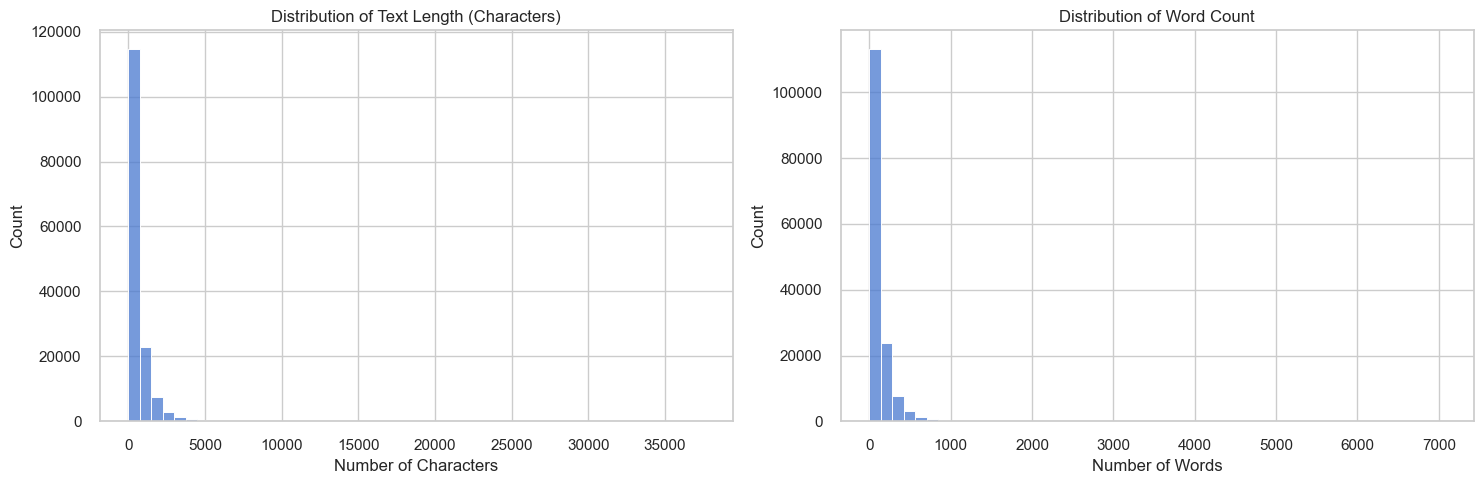


Text length statistics:
Average body length: 534.45 characters
Median body length: 214.00 characters
Average word count: 104.11 words
Median word count: 42.00 words


In [ ]:
# Text Length Analysis
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['body_length'], bins=50)
plt.title('Distribution of Text Length (Characters)')
plt.xlabel('Number of Characters')

plt.subplot(1, 2, 2)
sns.histplot(df['word_count'], bins=50)
plt.title('Distribution of Word Count')
plt.xlabel('Number of Words')
plt.tight_layout()

plt.savefig('eda_visualizations/text_length.png', 
            dpi=300, 
            bbox_inches='tight',
            facecolor='white') 

plt.show()

print("\nText length statistics:")
print(f"Average body length: {df['body_length'].mean():.2f} characters")
print(f"Median body length: {df['body_length'].median():.2f} characters")
print(f"Average word count: {df['word_count'].mean():.2f} words")
print(f"Median word count: {df['word_count'].median():.2f} words")

#### 4. Temporal Analysis
- Number of post over time
- Temporal patterns in mental health discussions

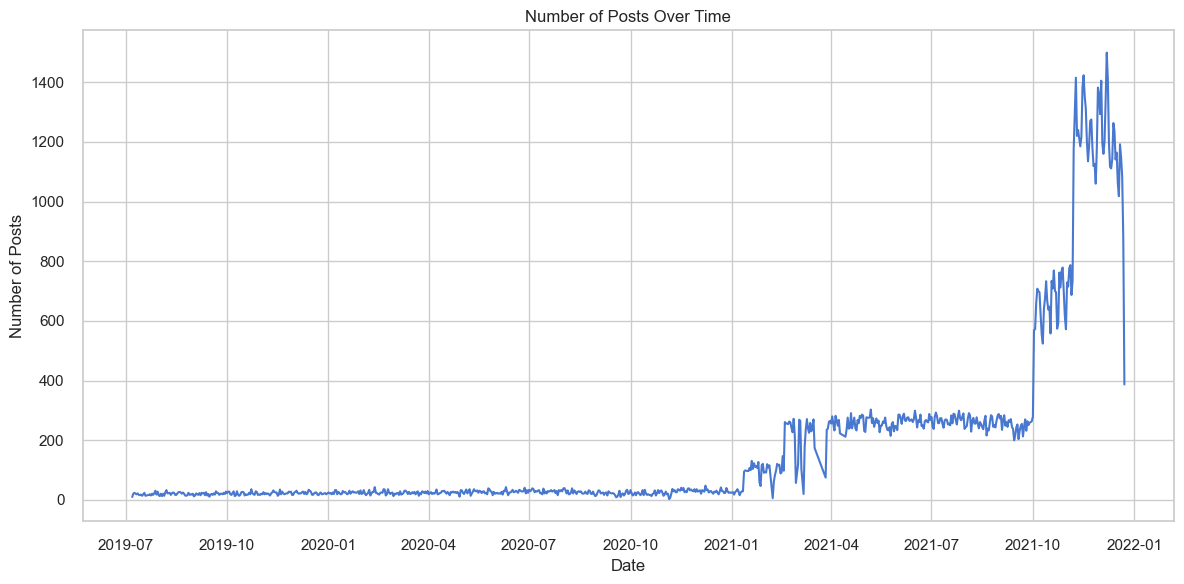

In [14]:
# Temporal analysis
df['created_utc'] = pd.to_datetime(df['created_utc'])
df['date'] = df['created_utc'].dt.date

plt.figure(figsize=(12, 6))
df.groupby('date').size().plot()
plt.title('Number of Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.tight_layout()

plt.savefig('eda_visualizations/temporal_analysis.png', 
            dpi=300, 
            bbox_inches='tight',
            facecolor='white') 

plt.show()

### 5. Engagement Analysis
- Score distribution
- Upvote ratio patterns

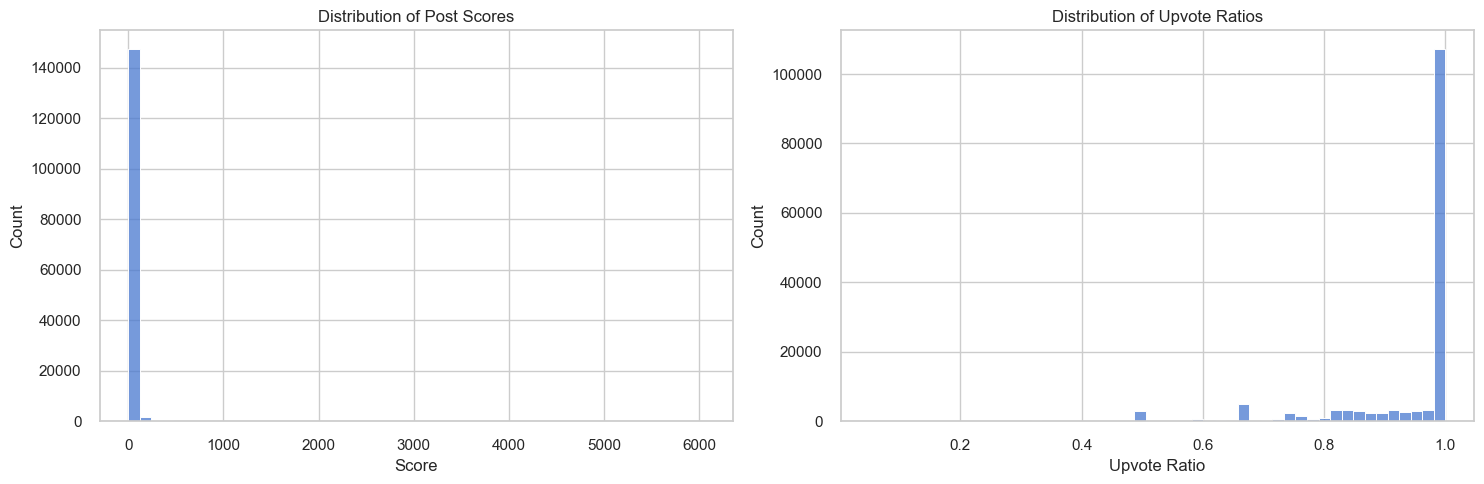

In [ ]:
# Engagement Metrics Analysis
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['score'], bins=50)
plt.title('Distribution of Post Scores')
plt.xlabel('Score')

plt.subplot(1, 2, 2)
sns.histplot(df['upvote_ratio'], bins=50)
plt.title('Distribution of Upvote Ratios')
plt.xlabel('Upvote Ratio')
plt.tight_layout()

plt.savefig('eda_visualizations/engagement_metrics.png', 
            dpi=300, 
            bbox_inches='tight',
            facecolor='white') 

plt.show()

### 6. Community Analysis
- Subreddit distribution visualization
- Post distribution across different mental health subreddits

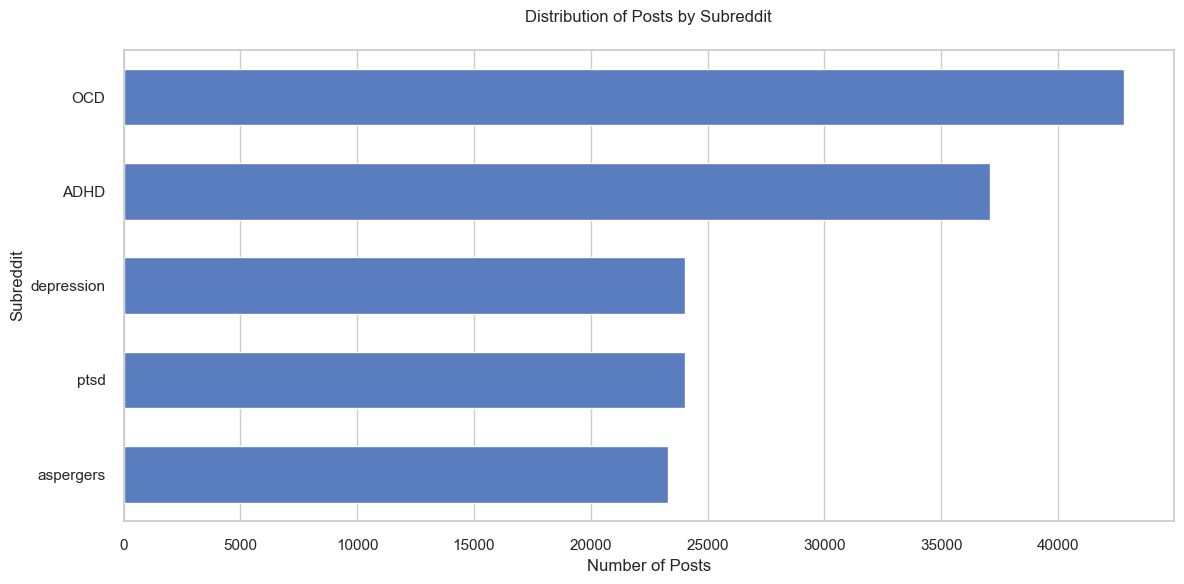

In [16]:
# Subreddit Analysis
plt.figure(figsize=(12, 6))
subreddit_counts = df['subreddit'].value_counts()
sns.barplot(x=subreddit_counts.values, 
            y=subreddit_counts.index,
            width=0.6)
plt.title('Distribution of Posts by Subreddit', pad=20)
plt.xlabel('Number of Posts')
plt.ylabel('Subreddit')
plt.tight_layout()

plt.savefig('eda_visualizations/subreddit_analysis.png', 
            dpi=300, 
            bbox_inches='tight',
            facecolor='white') 

plt.show()

### 7. Content Analysis
- Word cloud generation
  - Overall post content
  - Subreddit-specific content
- Key Word in Context (KWIC) analysis
  - Contextual understanding of frequent terms
  - Word usage patterns

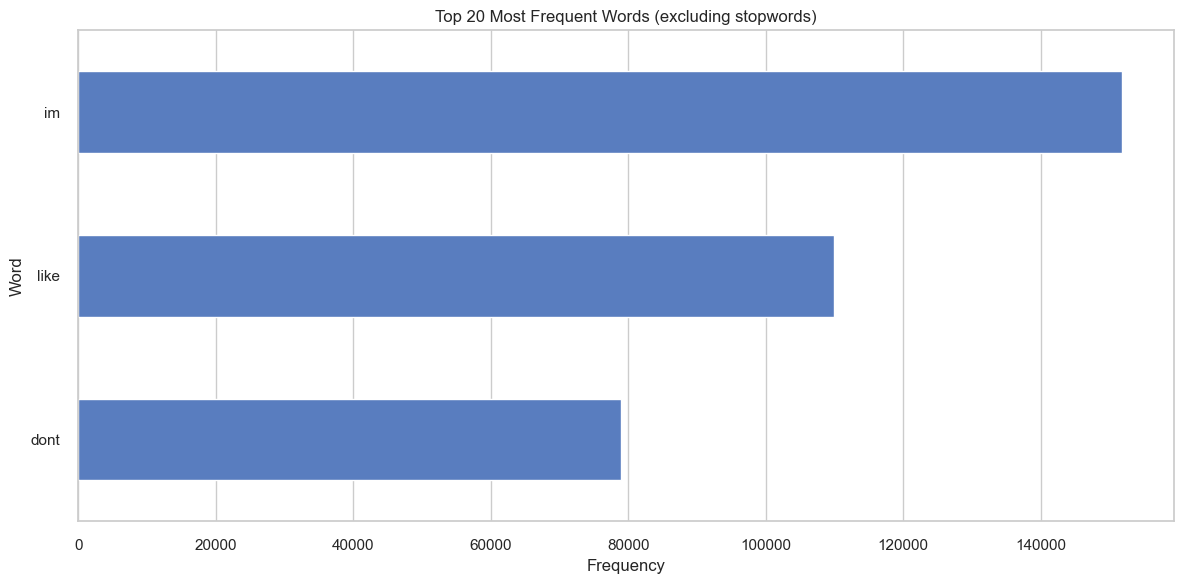

In [17]:
def get_top_words(texts, n=20):
    all_words = []
    for text in texts:
        words = word_tokenize(text)
        all_words.extend(words)
    fdist = FreqDist(all_words)
    return fdist.most_common(n)

# Get stopwords
stop_words = set(stopwords.words('english'))

# Get top words excluding stopwords
all_texts = df['processed_body'].dropna()
top_words = get_top_words(all_texts, 30)
top_words = [(word, count) for word, count in top_words if word not in stop_words]

# Plot top words
plt.figure(figsize=(12, 6))
words, counts = zip(*top_words[:20])
sns.barplot(x=list(counts), y=list(words), width=0.5)
plt.title('Top 20 Most Frequent Words (excluding stopwords)')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()

plt.savefig('eda_visualizations/top_words.png', 
            dpi=300, 
            bbox_inches='tight',
            facecolor='white') 

plt.show()

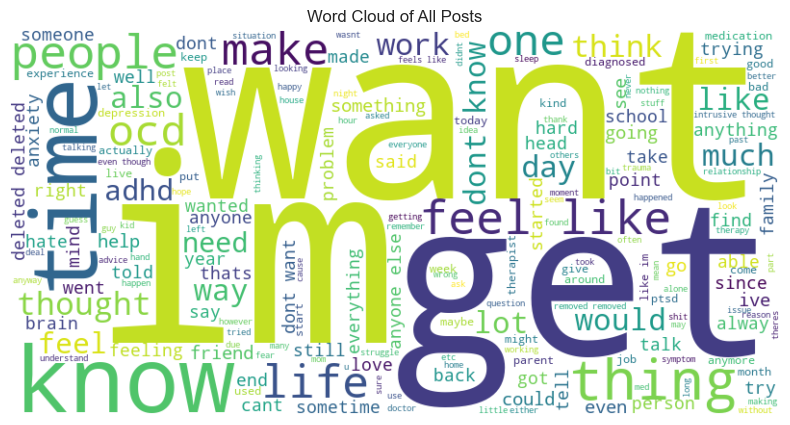

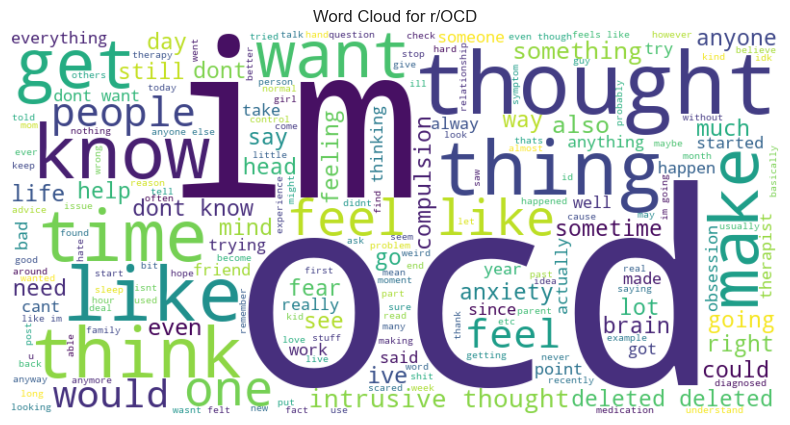

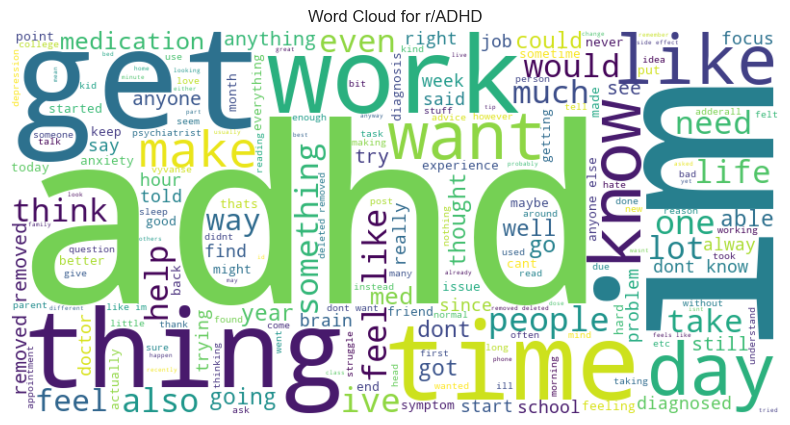

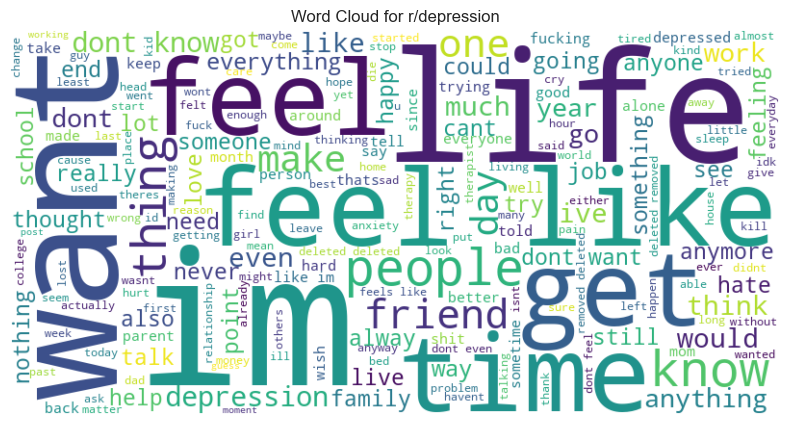

In [19]:
def create_wordcloud(text, title, save_path=None):
    wordcloud = WordCloud(width=800, height=400, 
                         background_color='white',
                         stopwords=stop_words).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    if save_path:
        plt.savefig(save_path, 
                   dpi=300,
                   bbox_inches='tight',
                   facecolor='white')
    plt.show()

# Create word cloud for all posts
all_text = ' '.join(df['processed_body'].dropna())
create_wordcloud(all_text, 'Word Cloud of All Posts')

# Create word clouds for top subreddits
top_subreddits = df['subreddit'].value_counts().head(3).index
for subreddit in top_subreddits:
    subreddit_text = ' '.join(df[df['subreddit'] == subreddit]['processed_body'].dropna())
    create_wordcloud(subreddit_text, f'Word Cloud for r/{subreddit}',
                     save_path=f'eda_visualizations/{subreddit}_wordcloud.png')
    

In [32]:
# KWIC
def preprocess_kwic(text):
    if pd.isna(text):
        return ""
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    tokens = word_tokenize(text)
    return ' '.join(tokens)

corpus_kwic = list(map(preprocess_kwic, df['processed_body'])) # Not for top subreddits
corpus_kwic = " ".join(corpus_kwic)
text_kwic = Text(word_tokenize(corpus_kwic))

def analyze_word_context(word, num_examples=20):
    print(f"\nAnalysis for word: {word}")
    print("-" * 100)
    concordance = text_kwic.concordance(word, width=100, lines=num_examples)
    if concordance:
        print(concordance)
    print("-" * 100)

In [34]:
# KWIC for the biggest words in word clouds
analyze_word_context('want')
analyze_word_context('im')
analyze_word_context('get')


Analysis for word: want
----------------------------------------------------------------------------------------------------
Displaying 20 of 43904 matches:
ental battery totally one of the reasons that i want to quit is that i can start to earn money and f
 they can be present in 1 person finally i dont want to get a diagnosis from you guys but i want som
ont want to get a diagnosis from you guys but i want some insights help also if you can relate to my
alking to a counselor but it might be to late i want us to try couples counseling but shes never bel
t doesnt mean shes not going to move out i dont want that to happen i dont want to put my kids throu
g to move out i dont want that to happen i dont want to put my kids through any of this i just hate 
y psychiatrist about it because i really do not want to go through changing medications again thank 
wont get accepted into any good colleges i dont want to be like everyone else in my family but i fee
d hyperfocusing on being healthy a

In [35]:
word_to_analyze = input("Enter a word to analyze: ")
analyze_word_context(word_to_analyze)


Analysis for word: anxiety
----------------------------------------------------------------------------------------------------
Displaying 20 of 17276 matches:
just experience a general heightened level of anxiety and i have certain physical compulsions like 
stopped after being 2 years in therapy for my anxiety emotion regulation and forming my own identit
h also could be coming from adhdi have social anxiety and agora phobia i also had an interview to a
us tendencies and some people find that their anxiety becomes worse on stimulants im currently taki
s at all unfortunately ive also found that my anxiety is worse when im on my medication i become an
at right now previously i just thought it was anxiety but my therapist thinks it might be more rela
ore like my adhd is more the root cause of my anxiety and depression that saidi got adderall from a
ing it over break was causing discontinuation anxiety depression that was made worse by my adderall
ds all semester which probably fucked w